In [21]:
import numpy as np
import matplotlib.pyplot as plt

a = 0 
b = 100 

# Function 
def f(x):
    x1, x2 = x
    return (a + 1 - x1)**2 + b * (x2 - x1**2)**2

# Gradient of the function
def grad_f(x):
    x1, x2 = x
    df_dx1 = -2 * (a + 1 - x1) + 4 * b * x1 * (x1**2 - x2)
    df_dx2 = 2 * b * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

In [22]:
def gradient_descent(x0, lr, tau):
    x = np.array(x0, dtype=float)
    k = 0
    while np.linalg.norm(grad_f(x)) > tau:
        x = x - lr * grad_f(x)
        k += 1
    return x, f(x), k

In [23]:
x0 = [-1.5, 1.5]
lr = 0.001
tolerances = [10**-p for p in range(1, 14)]

results = []

for tau in tolerances:
    minimizer, min_value, iterations = gradient_descent(x0, lr, tau)
    results.append((tau, minimizer, min_value, iterations))

# Display results in a table
print(f"{'Tolerance':<15} {'Minimizer':<30} {'Min Value':<15} {'Iterations':<10}")
for tau, minimizer, min_value, iterations in results:
    print(f"{tau:<15.1e} {str(minimizer):<30} {min_value:<15.4e} {iterations:<10}")

Tolerance       Minimizer                      Min Value       Iterations
1.0e-01         [0.89729408 0.8046997 ]        1.0568e-02      4175      
1.0e-02         [0.98892199 0.97792207]        1.2292e-04      9394      
1.0e-03         [0.9988834  0.99776358]        1.2488e-06      15099     
1.0e-04         [0.99988823 0.99977602]        1.2513e-08      20857     
1.0e-05         [0.99998882 0.9999776 ]        1.2514e-10      26621     
1.0e-06         [0.99999888 0.99999776]        1.2519e-12      32385     
1.0e-07         [0.99999989 0.99999978]        1.2514e-14      38150     
1.0e-08         [0.99999999 0.99999998]        1.2520e-16      43914     
1.0e-09         [1. 1.]                        1.2515e-18      49679     
1.0e-10         [1. 1.]                        1.2520e-20      55443     
1.0e-11         [1. 1.]                        1.2519e-22      61208     
1.0e-12         [1. 1.]                        1.2514e-24      66977     
1.0e-13         [1. 1.]               

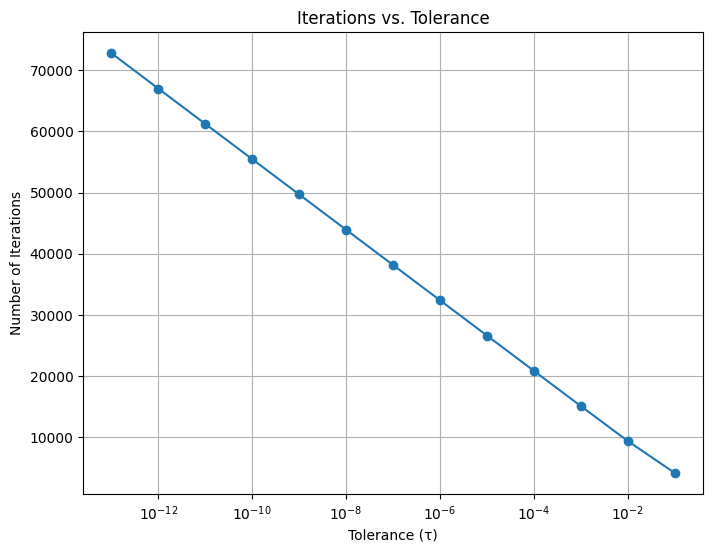

In [24]:
taus = [res[0] for res in results]
iterations = [res[3] for res in results]

plt.figure(figsize=(8, 6))
plt.plot(taus, iterations, marker='o')
plt.xscale('log')
plt.xlabel("Tolerance (τ)")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs. Tolerance")
plt.grid(True)
plt.show()

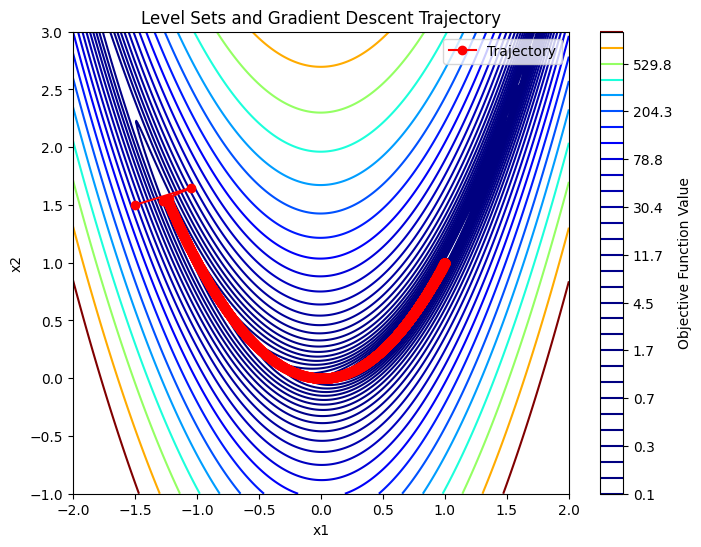

In [25]:
x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

# Trajectory
trajectory = []
x = np.array(x0, dtype=float)
trajectory.append(x)
while np.linalg.norm(grad_f(x)) > 1e-8: 
    x = x - lr * grad_f(x)
    trajectory.append(x)
trajectory = np.array(trajectory)

# Plot level sets and trajectory
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 30), cmap="jet")
plt.plot(trajectory[:, 0], trajectory[:, 1], marker="o", color="red", label="Trajectory")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Level Sets and Gradient Descent Trajectory")
plt.legend()
plt.colorbar(label="Objective Function Value")
plt.show()